Information from Office For National Statistics

Ethnic contrasts in COVID-19 deaths data first and second waves of the pandemic

"Main points During the first wave of the coronavirus (COVID-19) pandemic (24 January 2020 to 11 September 2020), people from all ethnic minority groups (except for women in the Chinese or "White Other" ethnic groups) had higher rates of death involving the coronavirus compared with the White British population.

The rate of death involving COVID-19 was highest for the Black African group (3.7 times greater than for the White British group for males, and 2.6 greater for females), followed by the Bangladeshi (3.0 for males, 1.9 for females), Black Caribbean (2.7 for males, 1.8 for females) and Pakistani (2.2 for males, 2.0 for females) ethnic groups.

In the second wave of the pandemic (from 12 September 2020 onwards), the differences in COVID-19 mortality compared with the White British population increased for people of Bangladeshi and Pakistani ethnic backgrounds; the Bangladeshi group had the highest rates, 5.0 and 4.1 times greater than for White British males and females respectively.

Whilst males and females of Black Caribbean and Black African background remained at elevated risk in the second wave, the relative risk compared with White British people was reduced compared with the first wave.

Adjusting for location, measures of disadvantage, occupation, living arrangements and pre-existing health conditions accounted for a large proportion of the excess COVID-19 mortality risk in most ethnic minority groups; however, most Black and South Asian groups remained at higher risk than White British people in the second wave even after adjustments."

https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/articles/coronaviruscovid19/latestinsights

### **Are cases/deaths different between different ethnic groups in London?**

- Is the COVID-19 death rate higher in London Regions with a high ethnic dermagraphic?

#### Data required to answer the question

- Population (London total)
- Ethnic groups (London total)
- Covid deaths (London total)
- London Region, there are 32 boroughs and 5 regions

###### London is divided into 32 Boroughs (local authority districts),  together with the City of London they make up the administrative area of Greater London; The City of London is not a Borough it is a ceremonial county (local government district) it functions differently from the London boroughs.

In [165]:
# Import the packages that we need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [166]:
# London Population
lon_pop = pd.read_csv("C:/Users/y_har/CFG-Project/data/population_c.csv")
lon_pop = lon_pop[['Region', 'sum_population']]

lon_pop.head()

,Region,sum_population
0,Central,8706
1,East,8726038
2,North,392140
3,East,8032233
4,West,330795


In [167]:
# London Ethnicity (breakdown of London ethnic population)
lon_eth_pop = pd.read_csv("C:/Users/y_har/CFG-Project/data/ethnic_c.csv")
lon_eth_pop = lon_eth_pop[['Region', 'all_bame_prop', 
                           'all_black_prop', 'pakistani_or_bangladeshi_prop',
                           'all_indian_prop']]
lon_eth_pop.head()

,Region,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop
0,Central,0.213695,0.026169,0.033627,0.029288
1,East,379.570220,126.746115,50.951277,60.998296
2,North,14.661652,3.143220,0.869021,3.153673
3,East,351.375843,117.241440,48.082275,56.404288
4,West,21.736664,6.291008,1.786122,6.457155


In [168]:
# London Covid-19 Deaths
lon_covid_deaths = pd.read_csv("C:/Users/y_har/CFG-Project/data/deaths_c.csv")
lon_covid_deaths = lon_covid_deaths[['Region', 'Borough', 'covid_19_deaths']]

lon_covid_deaths.head()

,Region,Borough,covid_19_deaths
0,Central,City of London,3
1,East,Barking and Dagenham,4861
2,North,Barnet,287
3,East,Bexley,4415
4,West,Brent,304


In [169]:
# Join dataframes London's Population, Ethnic Population and Covid-19 Deaths.
london_all = pd.concat([lon_pop, lon_eth_pop, lon_covid_deaths], axis=1 )

# Drop duplicate columns
london_all = london_all.T.drop_duplicates().T

london_all.head()

,Region,sum_population,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop,Borough,covid_19_deaths
0,Central,8706,0.213695,0.026169,0.033627,0.029288,City of London,3
1,East,8726038,379.57022,126.746115,50.951277,60.998296,Barking and Dagenham,4861
2,North,392140,14.661652,3.14322,0.869021,3.153673,Barnet,287
3,East,8032233,351.375843,117.24144,48.082275,56.404288,Bexley,4415
4,West,330795,21.736664,6.291008,1.786122,6.457155,Brent,304


In [170]:
# North London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
north_lon = london_all.loc[london_all['Region'].str.contains('North'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop', 
                                 'covid_19_deaths']].sum()
north_lon

sum_population                     11869789
all_bame_prop                    521.388934
all_black_prop                   170.056834
pakistani_or_bangladeshi_prop     80.009821
all_indian_prop                    79.18251
covid_19_deaths                        6331
dtype: object

In [171]:
# East London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
east_lon = london_all.loc[london_all['Region'].str.contains('East'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop', 
                                 'covid_19_deaths']].sum()
east_lon

sum_population                      36395158
all_bame_prop                    1604.329558
all_black_prop                    524.387286
pakistani_or_bangladeshi_prop     263.520649
all_indian_prop                   237.345498
covid_19_deaths                        19387
dtype: object

In [172]:
# South London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
south_lon = london_all.loc[london_all['Region'].str.contains('South'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop',
                                 'covid_19_deaths']].sum()
south_lon

sum_population                     16835800
all_bame_prop                    726.419942
all_black_prop                   238.587923
pakistani_or_bangladeshi_prop    110.437039
all_indian_prop                   105.80553
covid_19_deaths                        8868
dtype: object

In [173]:
# West London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
west_lon = london_all.loc[london_all['Region'].str.contains('West'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop',
                                 'covid_19_deaths']].sum()
west_lon

sum_population                     20856162
all_bame_prop                    933.925374
all_black_prop                   299.814782
pakistani_or_bangladeshi_prop    153.868974
all_indian_prop                  140.848469
covid_19_deaths                       10797
dtype: object

In [174]:
# Central London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
central_lon = london_all.loc[london_all['Region'].str.contains('Central'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop',
                                 'covid_19_deaths']].sum()
central_lon

sum_population                      6179831
all_bame_prop                    267.570189
all_black_prop                     89.77733
pakistani_or_bangladeshi_prop     53.108922
all_indian_prop                   26.145251
covid_19_deaths                        2978
dtype: object

In [175]:
# Create a dictionary with regions data

regions = {
'Region': ['North', 'East', 'South', 'West','Central'],
'all_bame_prop': [521.388934,1604.329558,726.419942,933.925374,267.570189],
'all_black_prop': [170.056834, 524.387286, 238.587923, 299.814782, 89.77733],
'pakistani_or_bangladeshi_prop': [80.009821,263.520649,110.437039,153.868974,53.108922],
'all_indian_prop': [79.18251, 237.345498, 105.80553, 140.848469, 26.145251],
'covid_19_deaths': [6331, 19387, 8868,  10797, 2978],
}
                                                                 
# Create a Dataframe from regions dictionary 
regions_df = pd.DataFrame(regions)
regions_df

,Region,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop,covid_19_deaths
0,North,521.388934,170.056834,80.009821,79.182510,6331
1,East,1604.329558,524.387286,263.520649,237.345498,19387
2,South,726.419942,238.587923,110.437039,105.805530,8868
3,West,933.925374,299.814782,153.868974,140.848469,10797
4,Central,267.570189,89.777330,53.108922,26.145251,2978


In [176]:
#print(regions_df.columns.tolist())
# Create dataframes for plottting.
bame_df = regions_df[['Region','all_bame_prop']]
black_df = regions_df[['Region','all_black_prop']] 
pakban_df = regions_df[['Region','pakistani_or_bangladeshi_prop']] 
indian_df = regions_df[['Region','all_indian_prop']] 
c19_death = regions_df[['Region','covid_19_deaths']]


<AxesSubplot: title={'center': "London's Covid-19 Deaths"}>

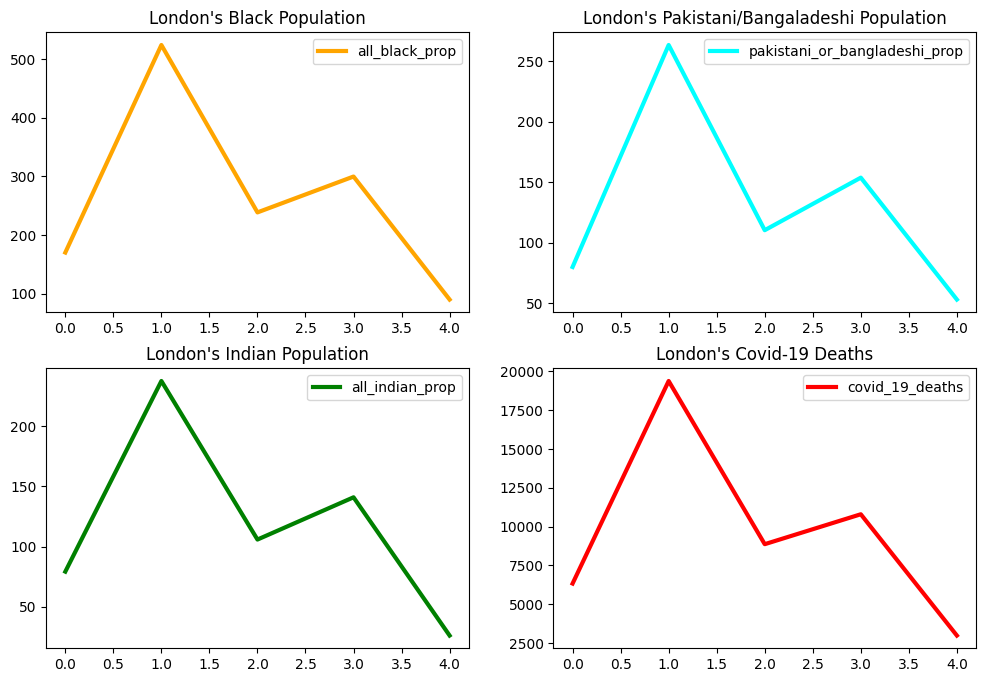

In [177]:
# Define the layout of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
#x = regions_df['Region']

# Add dataframes to the subplotss
black_df.plot(ax=axes[0,0], color= 'orange' , linewidth=3, title= "London's Black Population")
pakban_df.plot(ax=axes[0,1], color= 'cyan', linewidth=3, title= "London's Pakistani/Bangaladeshi Population")
indian_df.plot(ax=axes[1,0], color= 'green', linewidth=3, title= "London's Indian Population")
c19_death.plot(ax=axes[1,1], color= 'red', linewidth=3, title= "London's Covid-19 Deaths")

<Figure size 640x480 with 0 Axes>

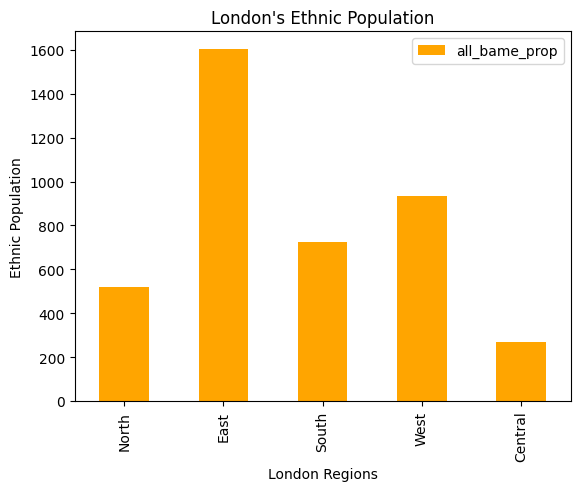

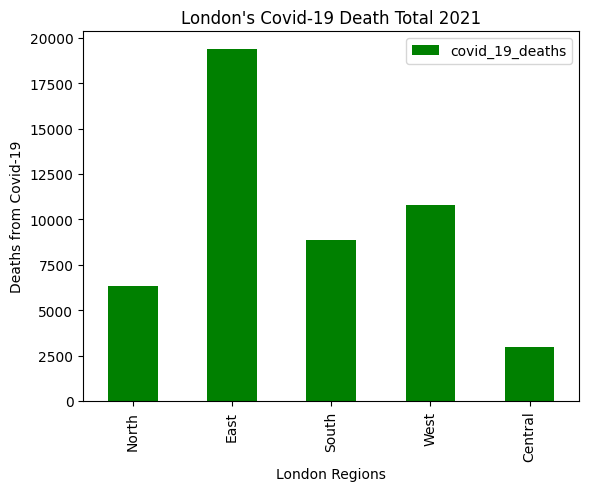

In [178]:
import matplotlib.pyplot as plt

#fig, plt.subplots(nrows=1, ncols=2, figsize=(12,8))

fig1 = plt.figure(1)
regions_df.plot(kind='bar',x='Region',y='all_bame_prop', color= 'orange')
plt.title("London's Ethnic Population")
plt.xlabel('London Regions')
plt.ylabel('Ethnic Population')

fig2 = plt.figure(2)
regions_df.plot(kind='bar',x= 'Region', y='covid_19_deaths', color= 'green')
plt.title("London's Covid-19 Death Total 2021")
plt.xlabel('London Regions')
plt.ylabel('Deaths from Covid-19')


plt.show()

Text(0.5, 0, 'London Regions')

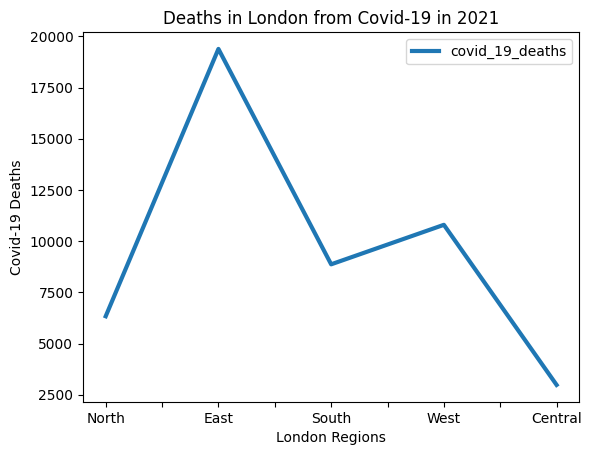

In [179]:
# Plot line graph of Covid deaths in London 
regions_df.plot(kind='line',x='Region',y='covid_19_deaths', linewidth= 3)

plt.title('Deaths in London from Covid-19 in 2021')
plt.ylabel('Covid-19 Deaths')
plt.xlabel('London Regions')

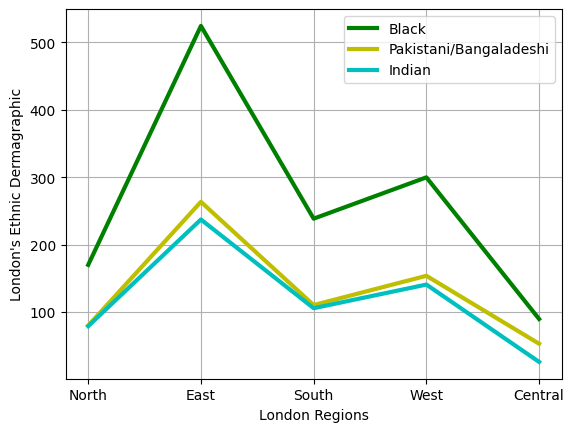

In [180]:
x = regions_df['Region']

y1 = regions_df['all_black_prop']
y2 = regions_df['pakistani_or_bangladeshi_prop']
y3 = regions_df['all_indian_prop']

#plt.plot(x,C19_deaths,'r',label='Covid Deaths',linewidth=3)
plt.plot(x,y1,'g',label='Black', linewidth= 3)
plt.plot(x,y2,'y',label= 'Pakistani/Bangaladeshi', linewidth= 3)
plt.plot(x,y3,'c',label='Indian', linewidth= 3)

#plt.title('Regions, population & death cases')
plt.ylabel("London's Ethnic Dermagraphic")
plt.xlabel('London Regions')

# Plot grid and legends
plt.grid()
plt.legend()

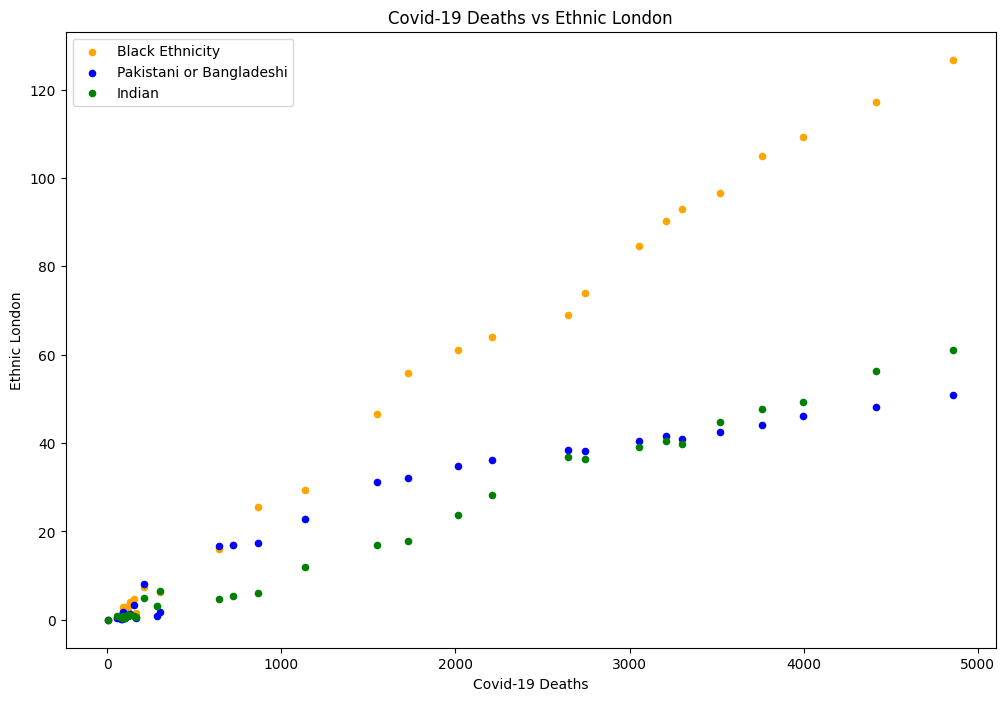

In [181]:
# Scatter plot showing Covid deaths against London's Ethnicities
fig = london_all.plot(kind='scatter',x='covid_19_deaths',y='all_black_prop',color='orange', label='Black Ethnicity')
london_all.plot(kind='scatter',x='covid_19_deaths',y='pakistani_or_bangladeshi_prop',color='blue', label='Pakistani or Bangladeshi',ax=fig)
london_all.plot(kind='scatter',x='covid_19_deaths',y='all_indian_prop',color='green', label='Indian', ax=fig)


fig.set_xlabel("Covid-19 Deaths")
fig.set_ylabel("Ethnic London")
fig.set_title("Covid-19 Deaths vs Ethnic London")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()